Homework 2 - 3.) problem 2.24

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Target function
def f(x):
    return x**2

N = 100000  # Number of runs
M = 200      # Number of points in x-grid for plotting

# Setting up an x-grid from -1 to 1
x_grid = np.linspace(-1, 1, M)


In [4]:
# Store h_i(x) for each run as a row in hvals
# hvals will be shape (N, M)
hvals = np.zeros((N, M))


In [5]:
# Main loop to sample x1, x2, fit line and evaluate on x_grid
for i in range(N):
    # Sample two random points in [-1,1]
    x1, x2 = np.random.uniform(-1, 1, size=2)
  
    y1, y2 = x1**2, x2**2

    # Fit the line a x + b through (x1, x1^2) and (x2, x2^2)
    # a = (y2 - y1)/(x2 - x1) simplifies to a = x1 + x2
    # b = y1 - a*x1 simplifies to -x1*x2
    a = x1 + x2
    b = - x1 * x2

    # Evaluate h_i(x) on the entire x_grid
    hvals[i,:] = a*x_grid + b


In [6]:
# avg function
gbar = np.mean(hvals, axis=0)

# 2) Computing Eout by averaging (h_i(x) - f(x))^2 over both i and x

f_grid = f(x_grid)
sq_errors = (hvals - f_grid)**2  # shape (N, M)
Eout = np.mean(sq_errors)        # average over all i,j

# bias = average over x of [gbar(x) - f(x)]^2
bias = np.mean( (gbar - f_grid)**2 )

#variance
variance_per_x = np.mean( (hvals - gbar)**2 , axis=0 ) 
variance = np.mean( variance_per_x )                    # average over x

In [11]:
print("Estimated results (N={:d} runs):".format(N))
print("E_out   =", Eout)
print("bias  =", bias)
print("var     =", variance)
print("bias+var=", bias + variance)



Estimated results (N=100000 runs):
E_out   = 0.5395767580393279
bias  = 0.20379544574590652
var     = 0.3357813122934212
bias+var= 0.5395767580393277


# From results we can see that E_out is nothing but sum of bias^2 and var. 
# E_out = bias + var

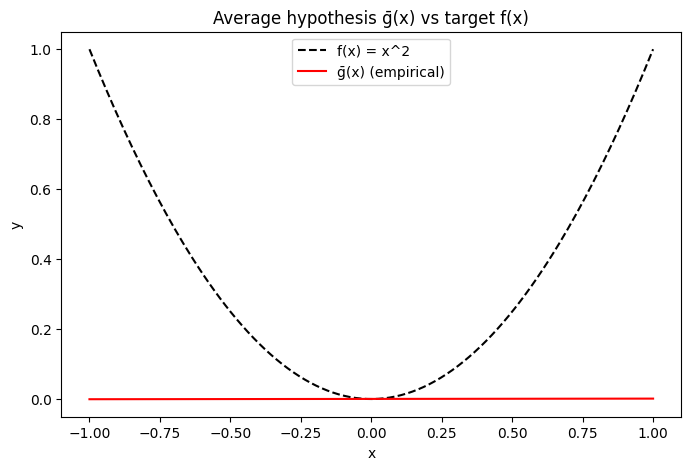

In [9]:
# 5) Plot f(x) and gbar(x)
plt.figure(figsize=(8,5))
plt.plot(x_grid, f_grid, 'k--', label="f(x) = x^2")
plt.plot(x_grid, gbar, 'r-', label="ḡ(x) (empirical)")
plt.title("Average hypothesis ḡ(x) vs target f(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()